In [2]:
import numpy as np
import numpy.matlib
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
from random import randint


In [3]:
from keras.datasets import mnist

Given code
-----------


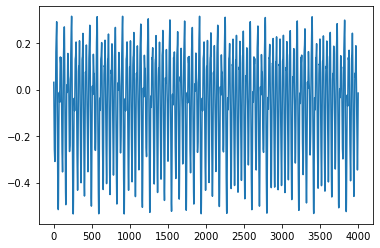

In [4]:

# check for intuition at  http://users.fs.cvut.cz/ivo.bukovsky/PVVR/prace_studentu/Mackey_Glass_time_series_prediction_Fuzzy_Lookup.pdf

def mackey_glass(tau, length):
    betta=0.2
    gamma = 0.1 
    a=10
    delay=100 # will cut these initial steps
    
    y=np.random.rand(tau) # random intial values between 0 and 1
    # Euler's method to solve the differential equation
    for t in range(tau-1, length+delay+tau-1):
        current= y[t] + ( betta * y[t-(tau-1)]   / ( 1 + np.power(y[t-(tau-1)], a) 
)  ) - gamma*y[t]   
        y=np.append(y, current)
    
    y=y-1 # get rid of mean
    y=np.tanh(y) # squeze with tanh    
    
    return y[tau+delay:length+delay+tau] # return the last length elements
length=4000 # duration of the series
tau=17 # delay in the equation
y=mackey_glass(tau, length)
#plot generated time-series
plt.plot(y)
plt.show()

Test
---------

In [9]:
res_size = 1000 #1000 neurons
scale = 0.2
weight_in = np.random.uniform(-1,1,(res_size,2))*scale
bias = 1
p = 0.8
weight_res = np.random.uniform(-1,1,(res_size,res_size))*scale
print(len(weight_in))

1000


In [11]:
#create training set
tr_set = []
test_set = []

print("Input weight size", weight_in.shape)

#Create input layer
for n in range(1,3000):
    u = 0.5*np.sin(n/4)
    tr_set.append(u) 

#Create testing set
for n in range(3000,4000):
    u = 0.5*np.sin(n/4)
    test_set.append(u)
    
#Convert to numpy data structure    
tr_set = np.array(tr_set)
test_set = np.array(test_set)

#Create reservoir
print(tr_set)

Input weight size (1000, 2)
[0.12370198 0.23971277 0.34081938 ... 0.49990152 0.48681585 0.44346233]
